## Locally Weighted Regression

- Read and Normalised the dataset
- Generate W for every query point
- No Training is involved, directly make predictions using closed form solution we derived
(X'WX)*(X'WY)
- Find the best value for Tau (Bandwidth) [Cross Validation]

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")
%matplotlib inline

### Loading Data

In [15]:
dfx=pd.read_csv("X.csv")
dfy=pd.read_csv("Y.csv")

In [16]:
X=dfx.values
Y=dfy.values

In [17]:
X.shape, Y.shape

((99, 1), (99, 1))

### Normalise

In [18]:
X_new=X-X.mean()/X.std()

### Visualise

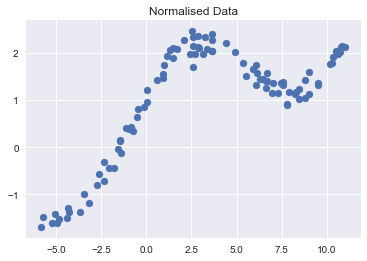

In [21]:
plt.figure()
plt.title("Normalised Data")
plt.scatter(X_new,Y)
plt.show()

### Computing W (Diagonal Matrix)

- if a,b are np arrays then a*b is Element Wise Multiplication
- if a,b are np matrixes then a*b is Matrix Multiplication

In [71]:
def getW(query_point,X,Tau):
    m=X.shape[0]
    W=np.mat(np.eye(m))
    
    for i in range(m):
        W[i,i]=np.exp(np.dot(X[i]-query_point,(X[i]-query_point).T)/(-2*Tau*Tau))
        
    return W

In [92]:
X_new=np.mat(X_new)
Y=np.mat(Y)

In [93]:
W=getW(-1,X_new,1)
print(W.shape)
print(W)

(99, 99)
[[4.51277044e-02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.59618838e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.37745546e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.18408464e-04
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.23469989e-11 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.42705618e-22]]


### Making Predictions

In [94]:
def predict(X,Y,Tau,query_point):
    M=X.shape[0]
    ones=np.ones((M,1))
    X_=np.hstack((ones,X))
    
    qx=np.mat([1,query_point])
    
    W=getW(qx,X_,Tau)
    
    theta=np.linalg.pinv(X_.T*W*X_)*(X_.T*(W*Y))
    pred=np.dot(qx,theta)
    
    return theta,pred
    

In [95]:
theta,pred=predict(X_new,Y,1.0,1.0)
print(theta)
print(pred)

[[1.0995633 ]
 [0.47842162]]
[[1.57798492]]


### Making Visualization, predictions and Tau Ananlysis

In [112]:
def plotPrediction(X,Y,Tau):
    X_test=np.linspace(-6,12,20)
    Y_test=[]
    
    for xq in X_test:
        theta,pred=predict(X,Y,xq,Tau)
        Y_test.append(pred[0][0])
        
    Y_test=np.array(Y_test)
    
    plt.figure()
    plt.title(f"Tau {Tau}")
    plt.scatter(np.array(X),np.array(Y))
    plt.scatter(X_test,Y_test,color="red")
    plt.show()

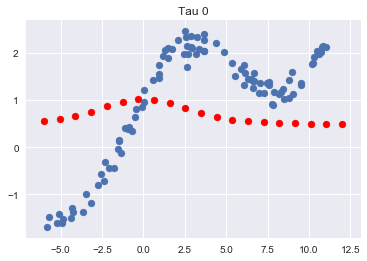

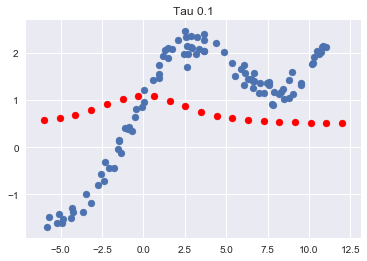

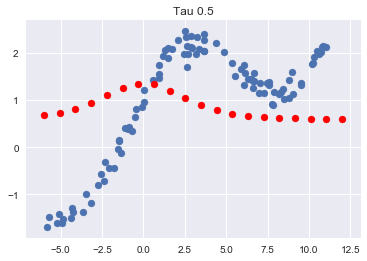

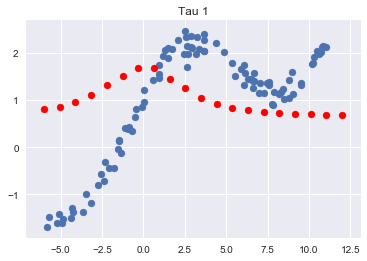

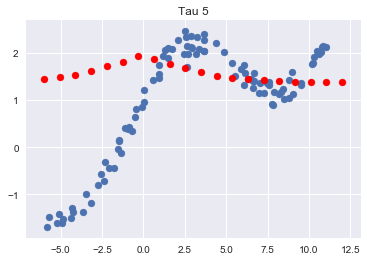

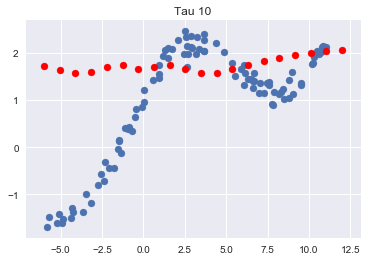

In [113]:
taus=[0,0.1,0.5,1,5,10]

for tau in taus:
    plotPrediction(X_new,Y,tau)